In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, classification_report,
                            precision_recall_curve, roc_curve, roc_auc_score)

In [2]:
# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [3]:
# Print dataset info
print("Dataset shape:", X.shape)
print("\nClass distribution:")
print(pd.Series(y).value_counts())
print("\nMalignant (0):", (y == 0).sum())
print("Benign (1):", (y == 1).sum())

Dataset shape: (569, 30)

Class distribution:
1    357
0    212
Name: count, dtype: int64

Malignant (0): 212
Benign (1): 357


In [4]:
# Split data into train-test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Fit Logistic Regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [7]:
# Make predictions (both probabilities and class predictions)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1
y_pred = log_reg.predict(X_test_scaled)  # Class predictions at default threshold (0.5)

In [8]:
# Evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Confusion Matrix:
[[41  1]
 [ 1 71]]


In [9]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)


In [10]:
# Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)


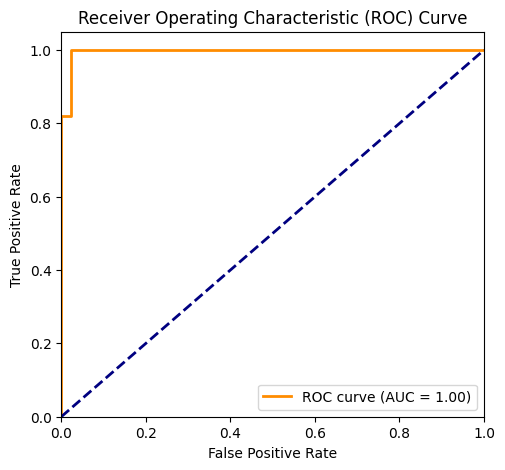

In [11]:
# Plot ROC Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

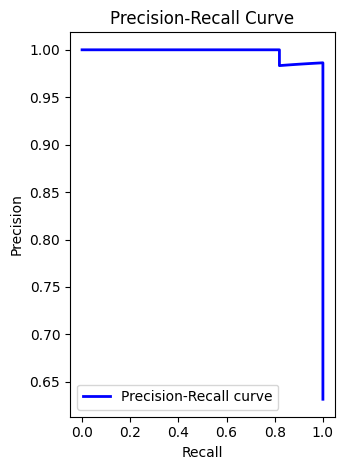

In [12]:
# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()


In [13]:
# Threshold tuning example
threshold = 0.3  # Lower threshold increases recall, decreases precision
y_pred_tuned = (y_pred_proba >= threshold).astype(int)

print(f"\nMetrics with threshold={threshold:.2f}:")
print(classification_report(y_test, y_pred_tuned, target_names=data.target_names))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))


Metrics with threshold=0.30:
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        42
      benign       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
[[40  2]
 [ 0 72]]
